In [94]:
import pandas_datareader as pdr


In [95]:
!pip install pandas-datareader


In [96]:
key='d80d92d66041be4aa59eeb428c2caa1059761736'


In [97]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\padal\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [98]:
df.to_csv('AAPL.csv')

In [99]:
import pandas as pd

In [100]:
df=pd.read_csv('AAPL.csv')

In [101]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-03-06 00:00:00+00:00,153.83,156.3000,153.4600,153.785,87558028,153.83,156.3000,153.4600,153.785,87558028,0.0,1.0
1253,AAPL,2023-03-07 00:00:00+00:00,151.60,154.0299,151.1300,153.700,56182028,151.60,154.0299,151.1300,153.700,56182028,0.0,1.0
1254,AAPL,2023-03-08 00:00:00+00:00,152.87,153.4700,151.8300,152.810,47204791,152.87,153.4700,151.8300,152.810,47204791,0.0,1.0
1255,AAPL,2023-03-09 00:00:00+00:00,150.59,154.5350,150.2250,153.559,53833582,150.59,154.5350,150.2250,153.559,53833582,0.0,1.0
1256,AAPL,2023-03-10 00:00:00+00:00,148.50,150.9400,147.6096,150.210,68572400,148.50,150.9400,147.6096,150.210,68572400,0.0,1.0


In [102]:
df1=df.reset_index()['close']

In [103]:
df1

0       178.44
1       178.65
2       178.02
3       175.30
4       175.24
         ...  
1252    153.83
1253    151.60
1254    152.87
1255    150.59
1256    148.50
Name: close, Length: 1257, dtype: float64

In [104]:
df1.shape

(1257,)

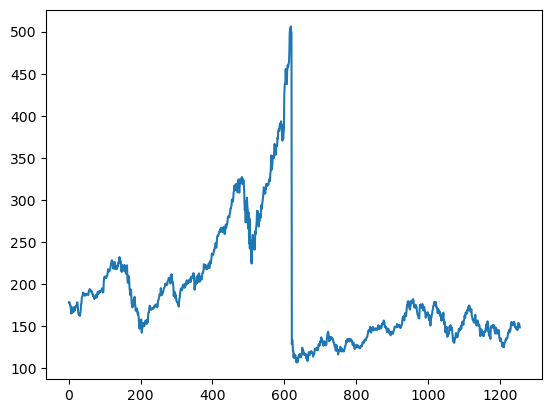

In [105]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [106]:
### LSTM are sensitive to the data. so we apply minmaxscaler

In [107]:
import numpy as np


In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [110]:
df1

array([[0.17933626],
       [0.17986224],
       [0.17828428],
       ...,
       [0.11529117],
       [0.10958046],
       [0.10434565]])

In [111]:
df1.shape

(1257, 1)

In [112]:
# splitting dataset into training and test
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [113]:
test_data

array([[0.05137132],
       [0.05921102],
       [0.05710708],
       [0.05838447],
       [0.06249217],
       [0.05916093],
       [0.06376957],
       [0.06797746],
       [0.06727614],
       [0.06654978],
       [0.06579837],
       [0.06998121],
       [0.07386349],
       [0.07544145],
       [0.07621791],
       [0.08295554],
       [0.08811522],
       [0.09450219],
       [0.09117095],
       [0.09585473],
       [0.09432686],
       [0.09718222],
       [0.1059737 ],
       [0.10429555],
       [0.09906074],
       [0.08919224],
       [0.09845961],
       [0.09658109],
       [0.10008766],
       [0.10449593],
       [0.10557295],
       [0.10001252],
       [0.09552912],
       [0.09718222],
       [0.09773325],
       [0.09688165],
       [0.10149029],
       [0.10046337],
       [0.10073889],
       [0.09843456],
       [0.09830933],
       [0.09708203],
       [0.09773325],
       [0.10532248],
       [0.10584847],
       [0.11090795],
       [0.10857858],
       [0.098

In [114]:
train_size,test_size

(817, 440)

In [115]:
# import numpy as np

In [116]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [117]:
timestep=100
X_train,y_train=create_dataset(train_data,timestep)
X_test,y_test=create_dataset(test_data,timestep)

In [118]:
X_train.shape,y_train.shape


((716, 100), (716,))

In [119]:
X_test.shape,y_test.shape


((339, 100), (339,))

In [120]:
y_train

array([2.56055103e-01, 2.51145899e-01, 2.51496556e-01, 2.55579211e-01,
       2.52197871e-01, 2.55554164e-01, 2.57758297e-01, 2.58985598e-01,
       2.66700063e-01, 2.77370069e-01, 2.72060113e-01, 2.71008140e-01,
       2.71033187e-01, 2.72135254e-01, 2.73813400e-01, 2.78271760e-01,
       2.82680025e-01, 2.90895429e-01, 2.96030056e-01, 3.02542267e-01,
       3.04370695e-01, 3.00638698e-01, 2.91195992e-01, 2.86687539e-01,
       2.79248591e-01, 2.93074515e-01, 2.86111459e-01, 2.99486537e-01,
       2.93049468e-01, 2.78121478e-01, 2.79023168e-01, 2.79348779e-01,
       2.83506575e-01, 2.77570445e-01, 2.85410144e-01, 2.88916719e-01,
       2.84483406e-01, 2.95829681e-01, 2.97808391e-01, 3.01615529e-01,
       3.06675016e-01, 3.13663118e-01, 3.03443957e-01, 2.94176581e-01,
       2.92874139e-01, 3.00638698e-01, 2.74314339e-01, 2.69530369e-01,
       2.88716343e-01, 2.76819036e-01, 2.88816531e-01, 2.86412023e-01,
       2.73462743e-01, 2.81703193e-01, 2.85059487e-01, 2.90269255e-01,
      

In [121]:
# reshape input to [samples,timesteps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [122]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [123]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 228ms/step - loss: 0.0485 - val_loss: 0.0018
Epoch 2/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0159 - val_loss: 0.0057
Epoch 3/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0116 - val_loss: 6.0703e-04
Epoch 4/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0092 - val_loss: 8.1731e-04
Epoch 5/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0087 - val_loss: 6.2589e-04
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0077 - val_loss: 5.8209e-04
Epoch 7/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0074 - val_loss: 6.4070e-04
Epoch 8/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0071 - val_loss: 3.5974e-04
Epoch 9/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0059 - val_loss: 3.1221e-04
Epoch 10/100
12/12 [==============================] - 2s 130ms/

12/12 [==============================] - 2s 132ms/step - loss: 0.0018 - val_loss: 2.1817e-04
Epoch 79/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0023 - val_loss: 3.2467e-04
Epoch 80/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0019 - val_loss: 2.2586e-04
Epoch 81/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0019 - val_loss: 3.2920e-04
Epoch 82/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0017 - val_loss: 2.0231e-04
Epoch 83/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0016 - val_loss: 2.1664e-04
Epoch 84/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0016 - val_loss: 3.0771e-04
Epoch 85/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0017 - val_loss: 2.0853e-04
Epoch 86/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0015 - val_loss: 2.3463e-04
Epoch 87/100
12/12 [==============================] - 2s 13

In [126]:
# Lets do predictions and check the metrics
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

11/11 [==============================] - 0s 30ms/step


In [127]:
# Inverse Transformations
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [128]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

228.87827275362253

In [129]:
math.sqrt(mean_squared_error(y_test,test_pred))

153.7798325799853

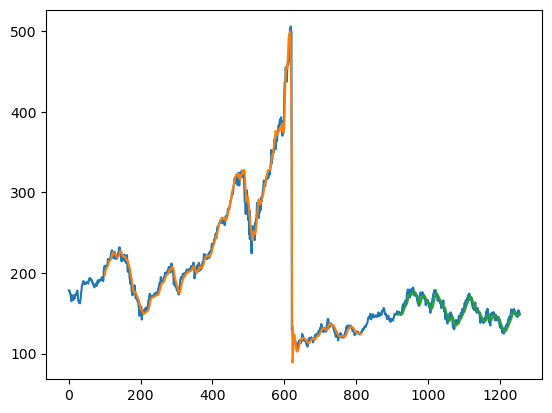

In [133]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [134]:
len(test_data)

440

In [137]:
X_input=test_data[340:].reshape(1,-1)

In [138]:
X_input.shape

(1, 100)

In [139]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [140]:
temp_input

[0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,

In [143]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.09244834 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368
 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435
 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299
 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375
 0.10311835 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622
 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014
 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929
 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675
 0.05808391 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167
 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978
 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594
 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088
 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.0998

7 day output [[0.10125181]]
8 day input [0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 

15 day output [[0.09674297]]
16 day input [0.07020664 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201
 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882
 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187
 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182 0.09675642
 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957 0.07165936
 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344
 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719
 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852
 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858
 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582
 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772
 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987
 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253
 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565 0.10567945
 0.10536136 0.104792

23 day output [[0.0919864]]
24 day input [0.10311835 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622
 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014
 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929
 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675
 0.05808391 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167
 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978
 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594
 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088
 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.10567945 0.10536136 0.10479225
 0.1041504  0.10351539 0.1029119  0.10233973 0.10178988 0.10125181
 0.10071664 0.10017765

In [144]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [145]:
import matplotlib.pyplot as plt


In [146]:
len(df1)


1257

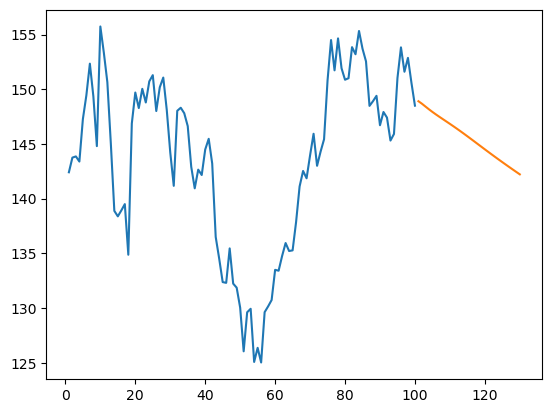

In [147]:
 
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

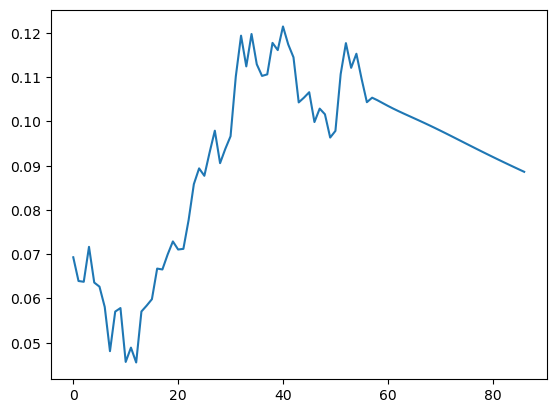

In [148]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [149]:
df3=scaler.inverse_transform(df3).tolist()

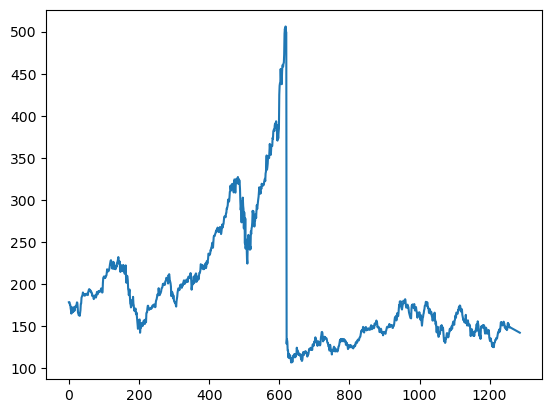

In [150]:
plt.plot(df3)
